## EPPS6356_FinalProject_IshdeepKaur 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl

%matplotlib inline 

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from scipy.stats import norm 
from scipy import stats, integrate 

In [3]:
#loading the dataset
melbourne_data = pd.read_csv(r"C:\Users\ishde\OneDrive\Desktop\epps 6356\Melbourne_housing_FULL.csv")

In [4]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Exploring data and data cleaning 

In [5]:
melbourne_data.shape

(34857, 21)

In [6]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
#change all objects to category 
print(melbourne_data.select_dtypes(["object"]).columns)
objdtype_cols = melbourne_data.select_dtypes(["object"]).columns
melbourne_data[objdtype_cols] = melbourne_data[objdtype_cols].astype("category")
melbourne_data.info()

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 1

In [8]:
#we will change the date to datetime 
#we will change the postcode to category
melbourne_data["Date"] = pd.to_datetime(melbourne_data["Date"])
melbourne_data["Postcode"] = melbourne_data["Postcode"].astype("category")
melbourne_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

## DATA PRESENTATION

In [9]:
#describe variables
#it will show only numerical variables
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


<AxesSubplot:>

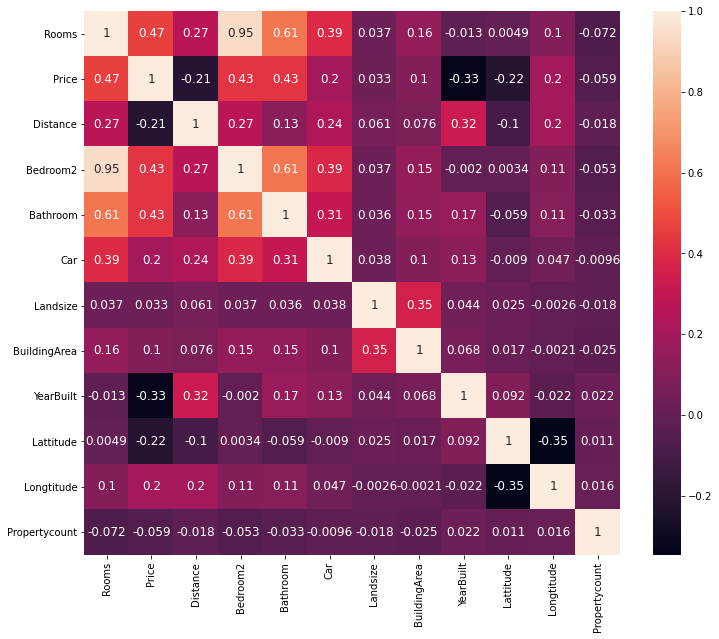

In [10]:
corrmat = melbourne_data.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":12})

In [11]:
#removing either of rooms or bedroom2 because they are the same
#dropping bedroom2
melbourne_data = melbourne_data.drop(["Bedroom2"],1)

In [12]:
#landsize, building area and year built are not useful variables for our research 
#so we will drop them
melbourne_data = melbourne_data.drop(["Landsize", "BuildingArea", "YearBuilt"], axis = 1)

In [13]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01
Longtitude,26881.0,1.450019e+02,0.120169,144.42379,144.93350,145.0078,1.450719e+02,1.455264e+02
Propertycount,34854.0,7.572888e+03,4428.090313,83.00000,4385.00000,6763.0000,1.041200e+04,2.165000e+04


## Missing Values

<AxesSubplot:>

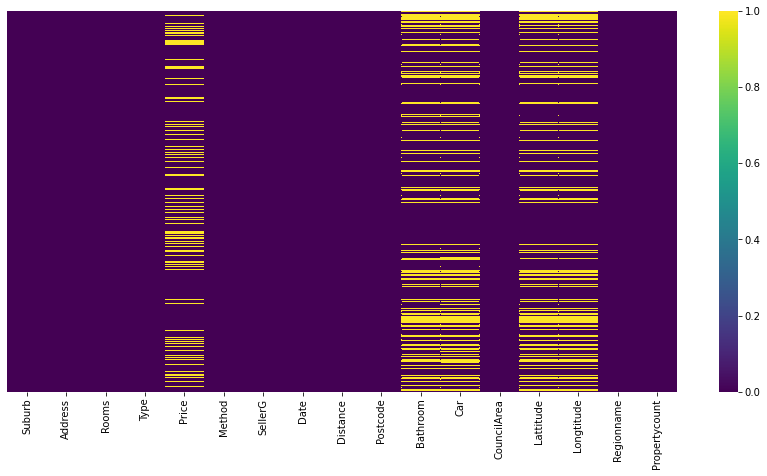

In [14]:
#visualize missing values 
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(melbourne_data.isnull(), yticklabels=False,cmap="viridis")

In [15]:
#with this we see there are missing values in price, bathroom, car, longitude and latitude 
#let's see the percentage of missing values
melbourne_data.isnull().sum()/len(melbourne_data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [16]:
#price has 21% missing values 
#price is our main variable to be studied 
#dropping the missing values in price 
melbourne_data.dropna(subset=["Price"], inplace=True)

In [17]:
#filling up the missing values in car and bathroom variables
melbourne_data["Car"] = melbourne_data["Car"].fillna(melbourne_data["Car"].mode()[0])
melbourne_data["Bathroom"] = melbourne_data["Bathroom"].fillna(melbourne_data["Bathroom"].mode()[0])

In [18]:
#filling up the missing values in latitude and longitude variables
melbourne_data["Lattitude"] = melbourne_data["Lattitude"].fillna(melbourne_data["Lattitude"].mode()[0])
melbourne_data["Longtitude"] = melbourne_data["Longtitude"].fillna(melbourne_data["Longtitude"].mode()[0])

In [19]:
#check details of our final cleaned data
melbourne_data.isnull().sum()/len(melbourne_data)*100

Suburb           0.00000
Address          0.00000
Rooms            0.00000
Type             0.00000
Price            0.00000
Method           0.00000
SellerG          0.00000
Date             0.00000
Distance         0.00367
Postcode         0.00367
Bathroom         0.00000
Car              0.00000
CouncilArea      0.01101
Lattitude        0.00000
Longtitude       0.00000
Regionname       0.01101
Propertycount    0.01101
dtype: float64

In [20]:
melbourne_data.shape

(27247, 17)

## FINDING OUTLIERS

In [21]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.40000,10.5000,1.400000e+01,4.810000e+01
Bathroom,27247.0,1.451683e+00,0.661993,0.00000,1.00000,1.0000,2.000000e+00,9.000000e+00
Car,27247.0,1.786655e+00,0.869543,0.00000,1.00000,2.0000,2.000000e+00,1.800000e+01
Lattitude,27247.0,-3.781365e+01,0.081348,-38.19043,-37.84283,-37.8361,-3.776600e+01,-3.739780e+01
Longtitude,27247.0,1.449967e+02,0.105928,144.42379,144.95435,144.9966,1.450483e+02,1.455264e+02
Propertycount,27244.0,7.566781e+03,4492.382418,83.00000,4294.00000,6567.0000,1.041200e+04,2.165000e+04


In [22]:
#dividing price data to know what afre the outliers
melbourne_data['PriceRange'] = np.where(melbourne_data['Price'] <= 100000, '0-100,000',  
                               np.where ((melbourne_data['Price'] > 100000) & (melbourne_data['Price'] <= 1000000), '100,001 - 1M',
                               np.where((melbourne_data['Price'] > 1000000) & (melbourne_data['Price'] <= 3000000), '1M - 3M',
                               np.where((melbourne_data['Price']>3000000) & (melbourne_data['Price']<=5000000), '3M - 5M',
                               np.where((melbourne_data['Price']>5000000) & (melbourne_data['Price']<=6000000), '5M - 6M',
                               np.where((melbourne_data['Price']>6000000) & (melbourne_data['Price']<=7000000), '6M - 7M',
                               np.where((melbourne_data['Price']>7000000) & (melbourne_data['Price']<=8000000), '7M-8M', 
                               np.where((melbourne_data['Price']>8000000) & (melbourne_data['Price']<=9000000), '8M-9M',
                               np.where((melbourne_data['Price']>9000000) & (melbourne_data['Price']<=10000000), '9M-10M', 
                               np.where((melbourne_data['Price']>10000000) & (melbourne_data['Price']<=11000000), '10M-11M', 
                               np.where((melbourne_data['Price']>11000000) & (melbourne_data['Price']<=12000000), '11M-12M', '')
                               ))))))))))

In [23]:
melbourne_data.groupby(["PriceRange"]).agg({"PriceRange":["count"]})

,PriceRange
,count
PriceRange,
"0-100,000",1
"100,001 - 1M",16496
11M-12M,1
1M - 3M,10304
3M - 5M,388
5M - 6M,40
6M - 7M,14
7M-8M,2


In [24]:
#outliers are values in price range 0-100000, 11M to 12M, 7M-8M and 8M-9M
#so we will remove them 
melbourne_data.drop(melbourne_data[(melbourne_data["PriceRange"] == "0-100,000") | 
                                  (melbourne_data["PriceRange"] == "7M-8M") | 
                                  (melbourne_data["PriceRange"] == "8M-9M") | 
                                  (melbourne_data["PriceRange"] == "11M-12M")].index, inplace=True)

In [25]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27242.0,2.992218e+00,0.954690,1.00000,2.000000,3.0000,4.000000e+00,1.600000e+01
Price,27242.0,1.049047e+06,634071.219952,112000.00000,635000.000000,870000.0000,1.295000e+06,7.000000e+06
Distance,27241.0,1.128051e+01,6.787762,0.00000,6.400000,10.5000,1.400000e+01,4.810000e+01
Bathroom,27242.0,1.451509e+00,0.661618,0.00000,1.000000,1.0000,2.000000e+00,9.000000e+00
Car,27242.0,1.786580e+00,0.869334,0.00000,1.000000,2.0000,2.000000e+00,1.800000e+01
Lattitude,27242.0,-3.781364e+01,0.081351,-38.19043,-37.842830,-37.8361,-3.776600e+01,-3.739780e+01
Longtitude,27242.0,1.449967e+02,0.105930,144.42379,144.954325,144.9966,1.450483e+02,1.455264e+02
Propertycount,27239.0,7.566708e+03,4492.624011,83.00000,4294.000000,6567.0000,1.041200e+04,2.165000e+04


In [26]:
#lets check outliers for room now
melbourne_data.groupby(["Rooms"])["Rooms"].count()

Rooms
1      1195
2      6787
3     11956
4      5916
5      1208
6       137
7        20
8        14
9         1
10        5
12        2
16        1
Name: Rooms, dtype: int64

In [27]:
#drop outliers in rooms
melbourne_data.drop(melbourne_data[(melbourne_data["Rooms"] == 12) |
                   (melbourne_data["Rooms"] == 16)].index,inplace=True)

In [28]:
melbourne_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27239.0,2.991079e+00,0.948347,1.00000,2.00000,3.0000,4.000000e+00,1.000000e+01
Price,27239.0,1.048780e+06,633264.427094,112000.00000,635000.00000,870000.0000,1.295000e+06,7.000000e+06
Distance,27238.0,1.127979e+01,6.786793,0.00000,6.40000,10.5000,1.400000e+01,4.810000e+01
Bathroom,27239.0,1.451155e+00,0.660108,0.00000,1.00000,1.0000,2.000000e+00,9.000000e+00
Car,27239.0,1.786299e+00,0.868535,0.00000,1.00000,2.0000,2.000000e+00,1.800000e+01
Lattitude,27239.0,-3.781365e+01,0.081352,-38.19043,-37.84283,-37.8361,-3.776600e+01,-3.739780e+01
Longtitude,27239.0,1.449967e+02,0.105898,144.42379,144.95435,144.9966,1.450483e+02,1.455264e+02
Propertycount,27236.0,7.566741e+03,4492.747970,83.00000,4294.00000,6567.0000,1.041200e+04,2.165000e+04


array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Bathroom'}>],
       [<AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Lattitude'}>],
       [<AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Propertycount'}>]], dtype=object)

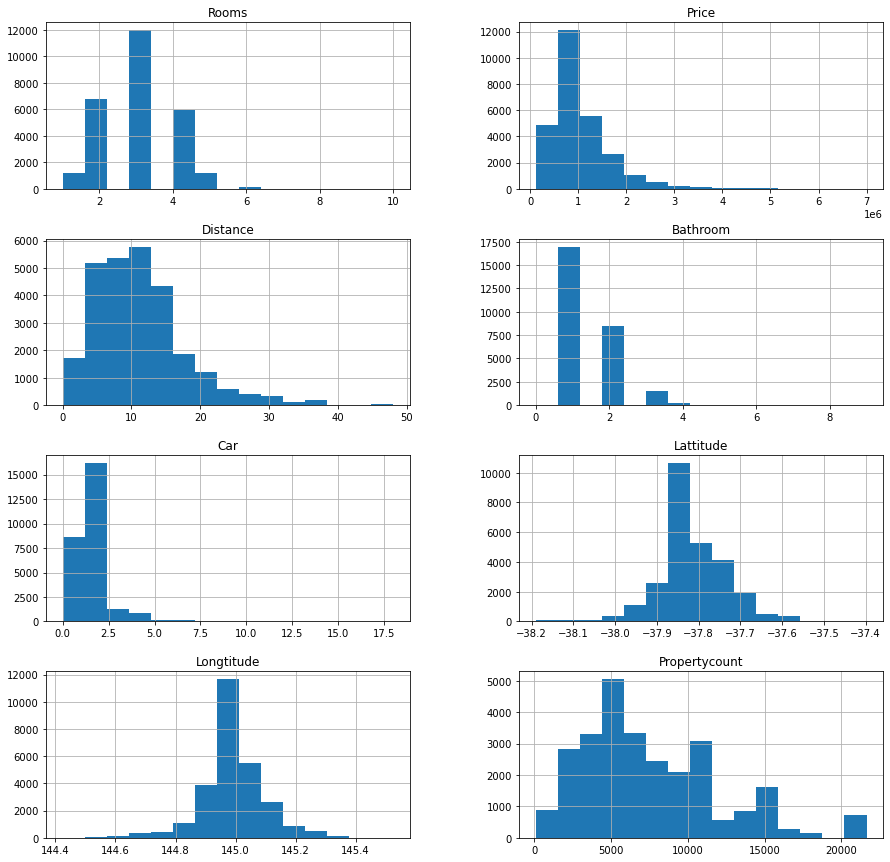

In [29]:
#plot histogram for out variables 
#define which all objets are numerics
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
melbourne_data.select_dtypes(include = numerics).hist(bins=15, figsize=(15,15), layout=(4,2))

In [29]:
melbourne_data.shape

(27239, 18)

## Data Presentation and Relationship 

In [30]:
#developing relationship between price & year and price & season
#extracting year from date 
melbourne_data["Year"] = melbourne_data["Date"].apply(lambda x:x.year)
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,PriceRange,Year
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1M - 3M,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1M - 3M,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1M - 3M,2017
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,"100,001 - 1M",2017
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1M - 3M,2016


In [31]:
#data subset by type 
#house price 
melbourne_data_h = melbourne_data[melbourne_data["Type"] == "h"]
#condo price
melbourne_data_u = melbourne_data[melbourne_data["Type"] == "u"]
#townhouse price
melbourne_data_t = melbourne_data[melbourne_data["Type"] == "t"]
#groupby year and mean 
melbourne_data_h_y = melbourne_data_h.groupby("Year").mean()
melbourne_data_u_y = melbourne_data_u.groupby("Year").mean()
melbourne_data_t_y = melbourne_data_t.groupby("Year").mean()
melbourne_data_h_y.head()

,Rooms,Price,Distance,Bathroom,Car,Lattitude,Longtitude,Propertycount
Year,,,,,,,,
2016,3.225399,1.285387e+06,9.231611,1.490436,1.743443,-37.809293,144.987426,7170.396766
2017,3.348415,1.180507e+06,13.330401,1.567866,1.920823,-37.807799,145.000629,7416.489105
2018,3.382669,1.126411e+06,14.337591,1.649156,1.986580,-37.796682,144.995534,7576.329498


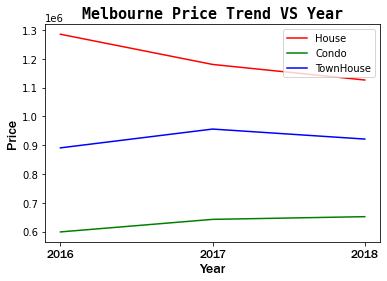

In [32]:
#plotting the relationship 
melbourne_data_h_y["Price"].plot(kind="line", color="r", label="House")
melbourne_data_u_y["Price"].plot(kind="line", color="g", label="Condo")
melbourne_data_t_y["Price"].plot(kind="line", color="b", label="TownHouse")
year_xticks=[2016,2017,2018]
#changing font
csfont = {'fontname':'monospace'}
hfont = {'fontname':'Franklin Gothic Medium'}
#changing size and font
plt.ylabel("Price", **hfont, size = 14, weight = "bold")
plt.xlabel("Year", **hfont, size = 14, weight = "bold")
plt.xticks(year_xticks, ** hfont, size = 12,)
plt.title("Melbourne Price Trend VS Year", **csfont, size = 15, weight="bold")
plt.legend()



In [34]:
#House price was going down dramatically by 100,000 units 
#Condo price climb up slowly while Townhouse price kept steady.
#From this graph, it is anticipated that house price will keptgoing down but less slope 
#Townhouse price will kepte unchanged Condo price will increase.
#To developer, it is time to built more condos in 2019
#.House budget need to be cut For home buyers, it is time to buy house in 2019.

### Predicting prices for houses in South Metro for 2019 and 2020 

In [33]:
## Predicting prices for houses in South Metro for 2019 and 2020 
melbourne_data.shape

(27239, 19)

In [34]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'PriceRange',
       'Year'],
      dtype='object')

In [35]:
melbourne_data_South_M = melbourne_data[melbourne_data["Regionname"]=="Southern Metropolitan"]
melbourne_data_SM_Avg = melbourne_data_South_M.groupby(["Year"])["Price"].mean()

In [36]:
#creat x and y axis
X = melbourne_data_South_M[["Year"]]
Y = melbourne_data_South_M[["Price"]]
#instantiate and fit
lm2 = LinearRegression()
lm2.fit(X,Y)
#print coefficients
print(lm2.intercept_)
print(lm2.coef_)

[-1.44577955e+08]
[[72380.18518551]]


In [37]:
#creating a dataframe for the expected prices of 2019,2020 and 2021
X_new = pd.DataFrame({"Year":[2019,2020,2021]})
#predicting for X_new
lm2.predict(X_new)

array([[1557639.01778024],
       [1630019.20296574],
       [1702399.38815126]])

In [38]:
#this tells us that the estimated pricesof 2019 houses in South metro area will bne 1557639
#2020 will be 1630019 and 2021 will be 1702399
#all type houses

### Predicting prices for houses in South Metro for 2019 and 2020 (UNITS=CONDOS)

In [39]:
melbourne_data_SM = melbourne_data[melbourne_data["Regionname"]=="Southern Metropolitan"]
melbourne_data_SM_u = melbourne_data_SM[melbourne_data_SM["Type"]=="u"]
melbourne_data_SM_u.shape

(2782, 19)

In [40]:
# create a fitted model
lm1 = smf.ols(formula="Price ~ Year", data=melbourne_data_SM_u).fit()

# print the coefficients
lm1.params

Intercept   -9.091530e+07
Year         4.542376e+04
dtype: float64

In [41]:
#create a dataframe for predicted values 
X_new = pd.DataFrame({"Year":[2016,2017,2018,2019,2020,2021]})

# predict for a new observation
lm1.predict(X_new)


0    659000.900688
1    704424.661081
2    749848.421474
3    795272.181867
4    840695.942260
5    886119.702653
dtype: float64

In [42]:
lm1.rsquared 

0.008001531244451132

In [45]:
#for condo in south metro region, the prices will be around 795272 for 2019, 840695 for 2020
#and 886119 for 2021 with an R2 of 0.008

### Predicting prices for houses in East Metro for 2019 and 2020 (UNITS=CONDOS)

In [43]:
melbourne_data_E = melbourne_data[melbourne_data["Regionname"]=="Eastern Metropolitan"]
melbourne_data_E_u = melbourne_data_E[melbourne_data_E["Type"]=="u"]
lme = smf.ols(formula="Price ~ Year", data=melbourne_data_E_u).fit()

# print the coefficients
lme.params

Intercept   -1.307691e+08
Year         6.518521e+04
dtype: float64

In [44]:
#create a dataframe for predicted values 
X_new = pd.DataFrame({"Year":[2016,2017,2018,2019,2020,2021]})

# predict for a new observations
gg = lme.predict(X_new)
print(gg)

0    644313.326193
1    709498.532146
2    774683.738098
3    839868.944051
4    905054.150004
5    970239.355957
dtype: float64


In [48]:
lme.rsquared


0.02739448980352288

In [49]:
#for condo the prices in 2019 are expected to be 839868, 905054 for 2020
#970239 for 2021 with an R2 of 0.02

## Seasonal Performance 

In [45]:
melbourne_data["Month"]=pd.DatetimeIndex(melbourne_data["Date"]).month
#prepare pie chart for month wise sales in years
melbourne_data_2016=melbourne_data[melbourne_data['Year']==2016]
melbourne_data_2017=melbourne_data[melbourne_data['Year']==2017]
melbourne_data_2018=melbourne_data[melbourne_data['Year']==2018]
melbourne_data_2016_count=melbourne_data_2016.groupby(['Month']).count()
melbourne_data_2017_count=melbourne_data_2017.groupby(['Month']).count()
melbourne_data_2018_count=melbourne_data_2018.groupby(['Month']).count()

Comparison={2016:melbourne_data_2016.shape,2017:melbourne_data_2017.shape,2018:melbourne_data_2018.shape}
Comparison

{2016: (8053, 20), 2017: (15512, 20), 2018: (3674, 20)}

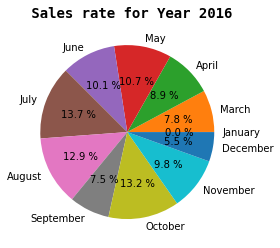

In [47]:
#2016 
label_2016=['January','March','April','May','June','July','August','September',
            'October','November','December']
plt.pie(melbourne_data_2016_count['Price'],labels=label_2016,autopct='%.1f %%')
plt.title(' Sales rate for Year 2016', size = 14, weight = "bold", **csfont)
plt.show()

Text(0.5, 1.0, 'Sales rate for Year 2017')

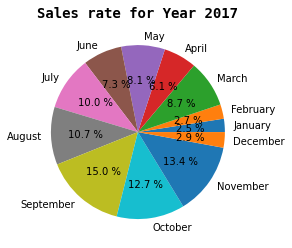

In [48]:
#2017
label_2017=['January','February','March','April','May','June','July','August',
            'September','October','November','December']
plt.pie(melbourne_data_2017_count['Price'],labels=label_2017,autopct='%.1f %%')
plt.title('Sales rate for Year 2017', size = 14, weight = "bold", **csfont)

Text(0.5, 1.0, 'Sales rate for Year 2018')

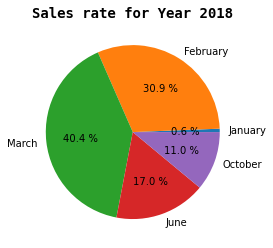

In [49]:
#2018
label_2018=['January','February','March','June','October']
plt.pie(melbourne_data_2018_count['Price'],labels=label_2018,autopct='%.1f %%')
plt.title('Sales rate for Year 2018', size = 14, weight = "bold", **csfont)

In [54]:
#In general, it looks like that winters in 2016 an 2017 have the least sales count.
#that means house sales will favors more from May to November. 
#Year 2018 seems a lot of missing data and date shape only one third compard to the others 
#thus it is hard to make conclusion.

## Sales count for each region 

In [50]:
sales_count=melbourne_data.groupby(["Regionname"])["Price"].count()
sales_count.head

<bound method NDFrame.head of Regionname
Eastern Metropolitan          3271
Eastern Victoria               166
Northern Metropolitan         7864
Northern Victoria              166
South-Eastern Metropolitan    1340
Southern Metropolitan         8520
Western Metropolitan          5814
Western Victoria                95
Name: Price, dtype: int64>

In [51]:
#top 10 region per type with largest sales count
Sales_count=melbourne_data.groupby(['Regionname','Type'])['Price'].count()
Sales_count.nlargest(10)

Regionname                  Type
Northern Metropolitan       h       5309
Southern Metropolitan       h       4718
Western Metropolitan        h       4435
Southern Metropolitan       u       2782
Eastern Metropolitan        h       2551
Northern Metropolitan       u       1689
South-Eastern Metropolitan  h       1036
Southern Metropolitan       t       1020
Northern Metropolitan       t        866
Western Metropolitan        u        810
Name: Price, dtype: int64

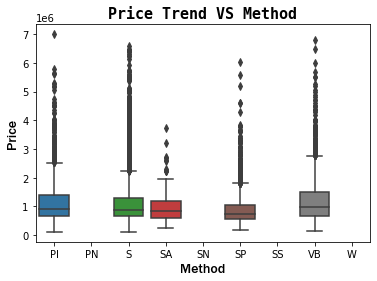

In [52]:
## Method VS Price
sns.boxplot(x="Method", y="Price", data=melbourne_data)
plt.ylabel("Price", **hfont, size = 14, weight = "bold")
plt.xlabel("Method", **hfont, size = 14, weight = "bold")
plt.title("Price Trend VS Method", **csfont, size = 15, weight="bold")
plt.show()

Text(0.5, 1.0, 'Room Prices VS Year')

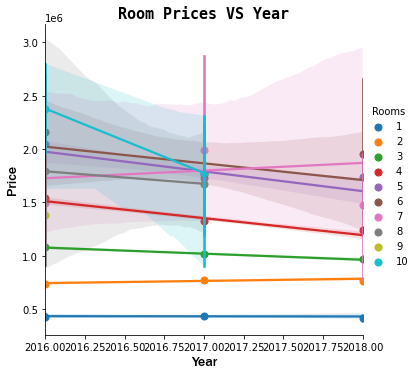

In [51]:
##Rooms Price VS Year
sns.lmplot(x="Year", y="Price", hue="Rooms", data=melbourne_data, x_estimator=np.mean)
plt.ylabel("Price", **hfont, size = 14, weight = "bold")
plt.xlabel("Year", **hfont, size = 14, weight = "bold")
plt.title("Room Prices VS Year", **csfont, size = 15, weight="bold")

Text(0.5, 1.0, 'Price Trend VS Rooms')

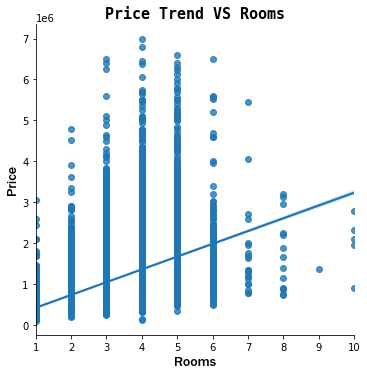

In [60]:
sns.lmplot(x="Rooms", y="Price", data = melbourne_data)
plt.ylabel("Price", **hfont, size = 14, weight = "bold")
plt.xlabel("Rooms", **hfont, size = 14, weight = "bold")
plt.title("Price Trend VS Rooms", **csfont, size = 15, weight="bold")

In [ ]:
#Rooms vs Prices
plt.barh("Price", "Rooms", data = melbourne_data)
plt.ylabel("Price", **hfont, size = 14, weight = "bold")
plt.xlabel("Method", **hfont, size = 14, weight = "bold")
plt.title("Price Trend VS Method", **csfont, size = 15, weight="bold")

Text(0.5, 1.0, 'Price Trend VS Distance')

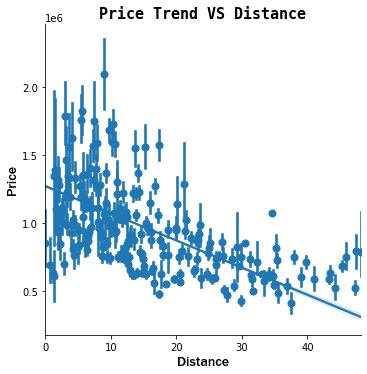

In [53]:
#Distance VS Price
sns.lmplot(x="Distance", y="Price", data=melbourne_data, x_estimator=np.mean);
plt.ylabel("Price", **hfont, size = 14, weight = "bold")
plt.xlabel("Distance", **hfont, size = 14, weight = "bold")
plt.title("Price Trend VS Distance", **csfont, size = 15, weight="bold")
#increase distance reduced price

Text(0.5, 1.0, 'Price Trend VS Cars')

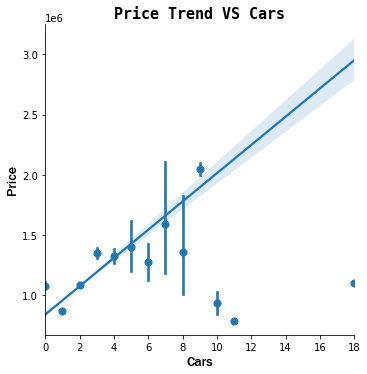

In [54]:
#Car park vs Price
sns.lmplot(x="Car", y="Price", data=melbourne_data, x_estimator=np.mean);
plt.ylabel("Price", **hfont, size = 14, weight = "bold")
plt.xlabel("Cars", **hfont, size = 14, weight = "bold")
plt.title("Price Trend VS Cars", **csfont, size = 15, weight="bold")

In [64]:
##Ideal House Type 
Ideal_house = melbourne_data.groupby(["Regionname","Type","Rooms","Bathroom"])["Price"].count()
Ideal_house.loc[["Southern Metropolitan"],"h"].nlargest(10)

Regionname             Type  Rooms  Bathroom
Southern Metropolitan  h     3      1.0         1153
                                    2.0          817
                             4      2.0          785
                             2      1.0          580
                             4      1.0          388
                                    3.0          299
                             5      3.0          169
                                    2.0          137
                                    1.0           73
                             2      2.0           59
Name: Price, dtype: int64

In [65]:
Ideal_house.nlargest(10)

Regionname             Type  Rooms  Bathroom
Northern Metropolitan  h     3      1.0         2034
Western Metropolitan   h     3      1.0         1659
Southern Metropolitan  u     2      1.0         1608
                       h     3      1.0         1153
Northern Metropolitan  u     2      1.0          931
                       h     2      1.0          912
Southern Metropolitan  h     3      2.0          817
                             4      2.0          785
Northern Metropolitan  h     3      2.0          779
Western Metropolitan   h     3      2.0          769
Name: Price, dtype: int64

## Heat map for presenting relationship

<AxesSubplot:>

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


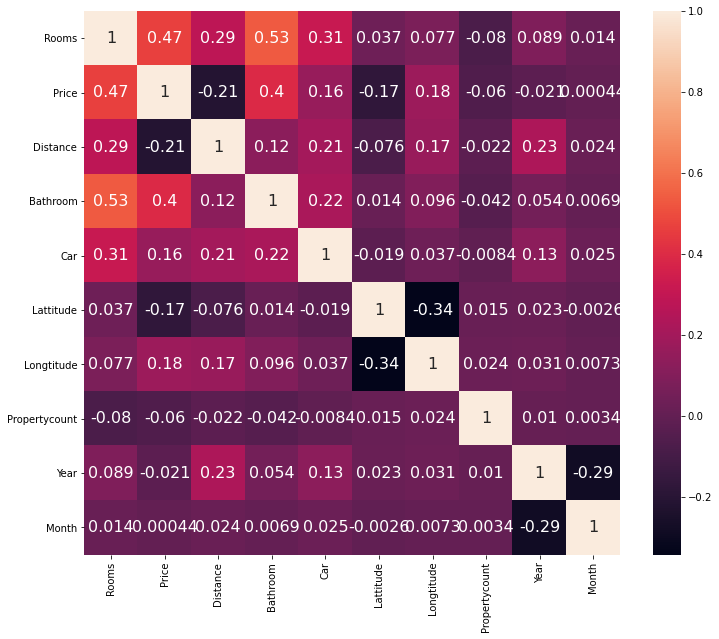

In [75]:
corrmat = melbourne_data.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, annot=True, annot_kws={"size":16})

In [67]:
#rooms and bathroom have the highest correlation with house price compared to other factors 